# Song classification and recommendation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("../data/raw/spotify_dataset_train.csv")

In [ ]:
vc =df_train['genre'].value_counts()

<bound method Series.keys of genre
pop          5181
rock         3695
hip hop      2926
rap          1654
edm          1593
jazz         1516
dance        1371
electro      1081
country      1042
punk          994
metal         578
soul          505
chanson       489
classical     393
latin         378
folk          372
disco         355
r&b           352
reggae        281
techno        265
blues         246
salsa         225
Name: count, dtype: int64>

## General info

In [ ]:
df_train.info()# attention mode est aussi boolean

<class 'pandas.DataFrame'>
RangeIndex: 25492 entries, 0 to 25491
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   release_date      25492 non-null  str    
 1   explicit          25492 non-null  bool   
 2   popularity        25492 non-null  int64  
 3   danceability      25492 non-null  float64
 4   energy            25492 non-null  float64
 5   key               25492 non-null  int64  
 6   loudness          25492 non-null  float64
 7   mode              25492 non-null  int64  
 8   speechiness       25492 non-null  float64
 9   acousticness      25492 non-null  float64
 10  instrumentalness  25492 non-null  float64
 11  liveness          25492 non-null  float64
 12  valence           25492 non-null  float64
 13  tempo             25492 non-null  float64
 14  duration_ms       25492 non-null  int64  
 15  time_signature    25492 non-null  int64  
 16  genre             25492 non-null  str    
dtypes: b

In [ ]:
df_train.shape

(25492, 17)

In [ ]:
df_train.head()

,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,2015-06-23,False,38,0.509,0.8720,2,-5.170,1,0.0547,0.0396,0.000015,0.3310,0.4860,95.969,194375,4,country
1,2021-11-12,False,58,0.182,0.0377,11,-33.748,0,0.0391,0.9870,0.957000,0.0804,0.0923,100.482,241804,4,classical
2,2013-06-21,False,36,0.550,0.9410,0,-3.128,0,0.0849,0.0182,0.003750,0.3120,0.3510,145.006,260276,4,rap
3,2012-09-04,False,0,0.569,0.7190,6,-8.399,0,0.0663,0.8670,0.941000,0.1760,0.6430,145.118,165200,4,blues
4,2008,False,0,0.631,0.6610,8,-5.694,1,0.0558,0.0146,0.720000,0.3650,0.3300,130.004,245933,4,dance


## Stats

In [ ]:
df_train.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,2.549200e+04,25492.000000
mean,31.185784,0.600785,0.666671,5.319630,-7.827989,0.617841,0.098590,0.247458,0.121762,0.194426,0.517368,122.020427,2.357300e+05,3.949004
std,26.647985,0.167052,0.223217,3.577066,4.190793,0.485925,0.100955,0.298900,0.264749,0.160047,0.252768,28.000996,9.605836e+04,0.313024
min,0.000000,0.000000,0.000020,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.008290,0.000000,0.000000,1.344000e+04,0.000000
25%,0.000000,0.494000,0.526000,2.000000,-9.618250,0.000000,0.038000,0.012900,0.000000,0.093475,0.318000,99.996000,1.833298e+05,4.000000
50%,33.000000,0.613000,0.700000,5.000000,-6.944500,1.000000,0.054400,0.098400,0.000099,0.129000,0.518000,123.130000,2.179200e+05,4.000000
75%,54.000000,0.723000,0.846000,8.000000,-5.047750,1.000000,0.111000,0.415000,0.031700,0.254000,0.721000,139.936000,2.656698e+05,4.000000
max,98.000000,0.988000,1.000000,11.000000,1.869000,1.000000,0.934000,0.996000,0.989000,0.988000,0.988000,244.613000,2.516987e+06,5.000000


Il existe certaines données disparates dont nous devons tenir compte lorsque nous utilisons les données pour entraîner un modèle.
1. Nous devons normaliser les données, car alors que le volume sonore varie entre -60 et 1,8, la durée en millisecondes peut atteindre des millions.
2. Il peut y avoir des valeurs aberrantes dans la durée en millisecondes : 75 % des données se situent à 265 k et la valeur maximale est de 2,6 M, soit 10 fois plus.

In [ ]:
df_train.isna().sum()

release_date        0
explicit            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [ ]:
df_train.nunique()

release_date         5597
explicit                2
popularity             99
danceability          917
energy               1265
key                    12
loudness            11339
mode                    2
speechiness          1279
acousticness         3890
instrumentalness     4746
liveness             1605
valence              1416
tempo               19155
duration_ms         18616
time_signature          5
genre                  22
dtype: int64

C:\Users\alfar\AppData\Local\Temp\ipykernel_4076\727536109.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=df_counts, palette='viridis')


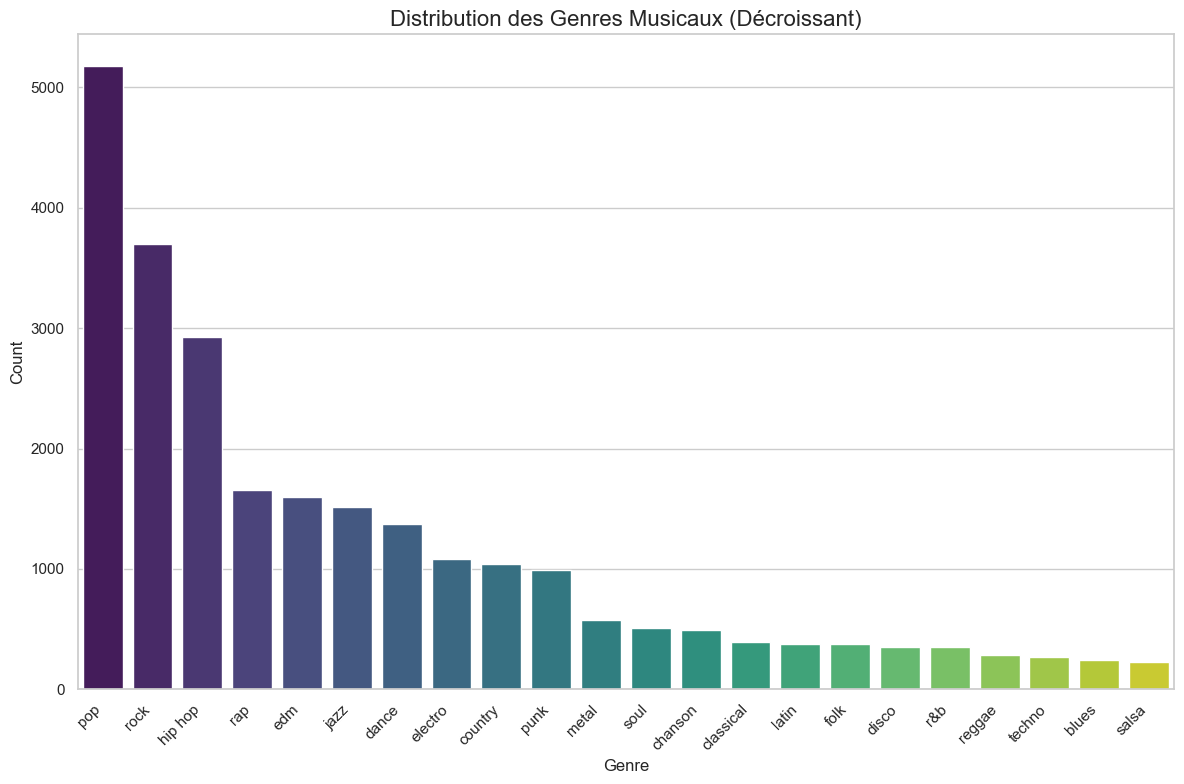

In [ ]:

df_counts = df_train['genre'].value_counts().reset_index()
df_counts.columns = ['Genre', 'Count']

# Configuration et tracé
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(x='Genre', y='Count', data=df_counts, palette='viridis')

plt.title('Distribution des Genres Musicaux (Décroissant)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

les classes sont déséquilibrées aevc une sureprésentation du pop rock et hip hop 

In [ ]:
from sklearn.preprocessing import LabelEncoder

#preprocessing 
df_train_copy = df_train.copy() # pour eviter les pb

le = LabelEncoder()
df_train_copy['genre']=le.fit_transform(df_train_copy['genre'])


#pour les dates, on cosidere leurs écarts par rapport a la premiere date. la premiere est considéré a 0.

df_train_copy['release_date'] = pd.to_datetime(df_train_copy['release_date'],format='mixed')
min_date = df_train_copy['release_date'].min()
df_train_copy['days_since_1900'] = (df_train_copy['release_date'] - min_date).dt.days
df_train_copy['days_since_1900'].sort_values()



16719        0
22636     8400
24613     8400
11288     8400
15514     9131
         ...  
10436    44570
24232    44573
16511    44573
19383    44573
22166    44573
Name: days_since_1900, Length: 25492, dtype: int64

In [ ]:

FEATURES = list( df_train_copy.columns[1:] )# retirer la date pour simplifier
print(FEATURES)
df_train_clean = df_train_copy[FEATURES]
df_train_clean['explicit'] = df_train_clean['explicit'].astype(int) 
dummy_df = pd.get_dummies(df_train_clean)
df_train_clean.head()
df_train_clean.to_csv("../data/preprocessed/spotify_dataset_train.csv")


['explicit', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'genre', 'days_since_1900']


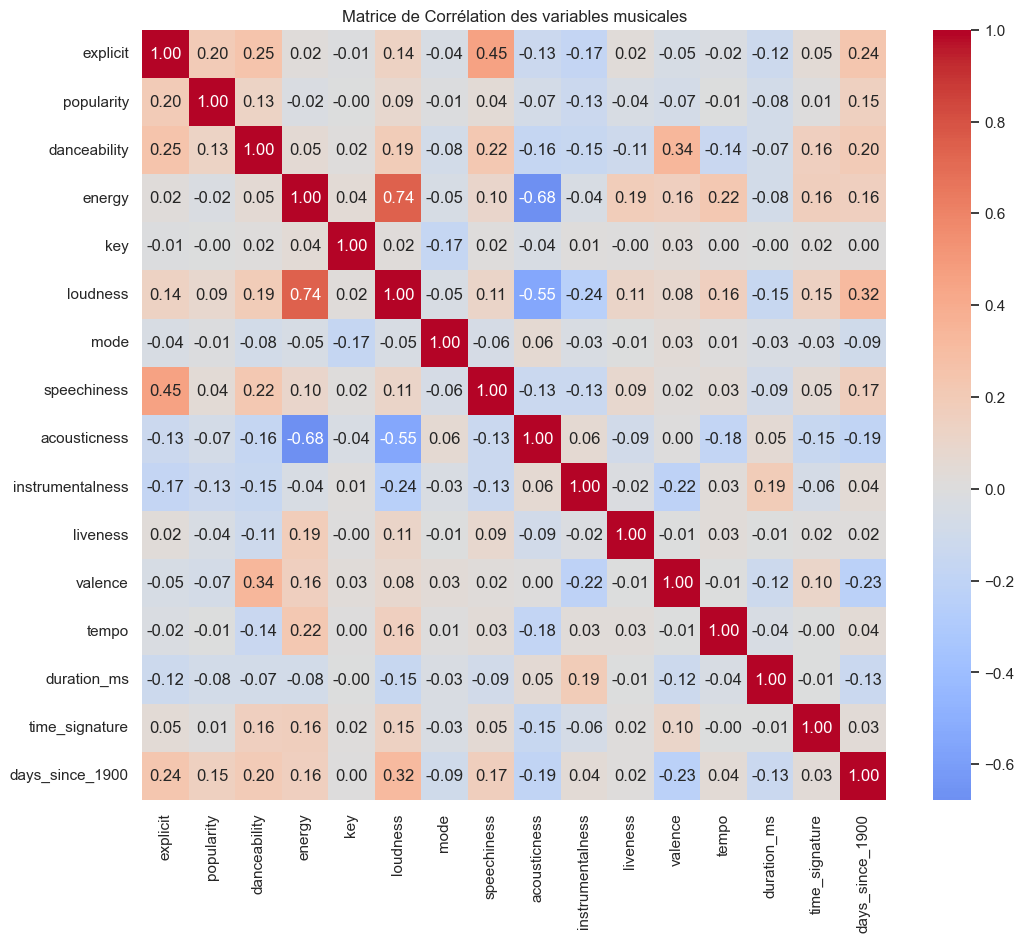

In [ ]:
plt.figure(figsize=(12, 10))
features_train = df_train_clean.drop(columns=['genre'])

sns.heatmap(features_train.corr(), 
            annot=True,      
            fmt=".2f",      
            cmap='coolwarm', 
            center=0)       

plt.title("Matrice de Corrélation des variables musicales")
plt.show()

Il existe une multicolinéarité entre l'énergie et le volume sonore, ainsi qu'une corrélation négative entre l'acoustique, l'énergie et le volume sonore. 
Cependant, la suppression de variables peut entraîner une perte d'informations et, pour certains modèles, la présence de variables redondantes n'a aucune incidence.
En général, si nous utilisons des modèles linéaires, il est recommandé de réduire la redondance à l'aide de le PCA par exemple, afin de réaliser une combinaison linéaire des caractéristiques sans perdre leurs valeurs les plus importantes.

In [ ]:
df_

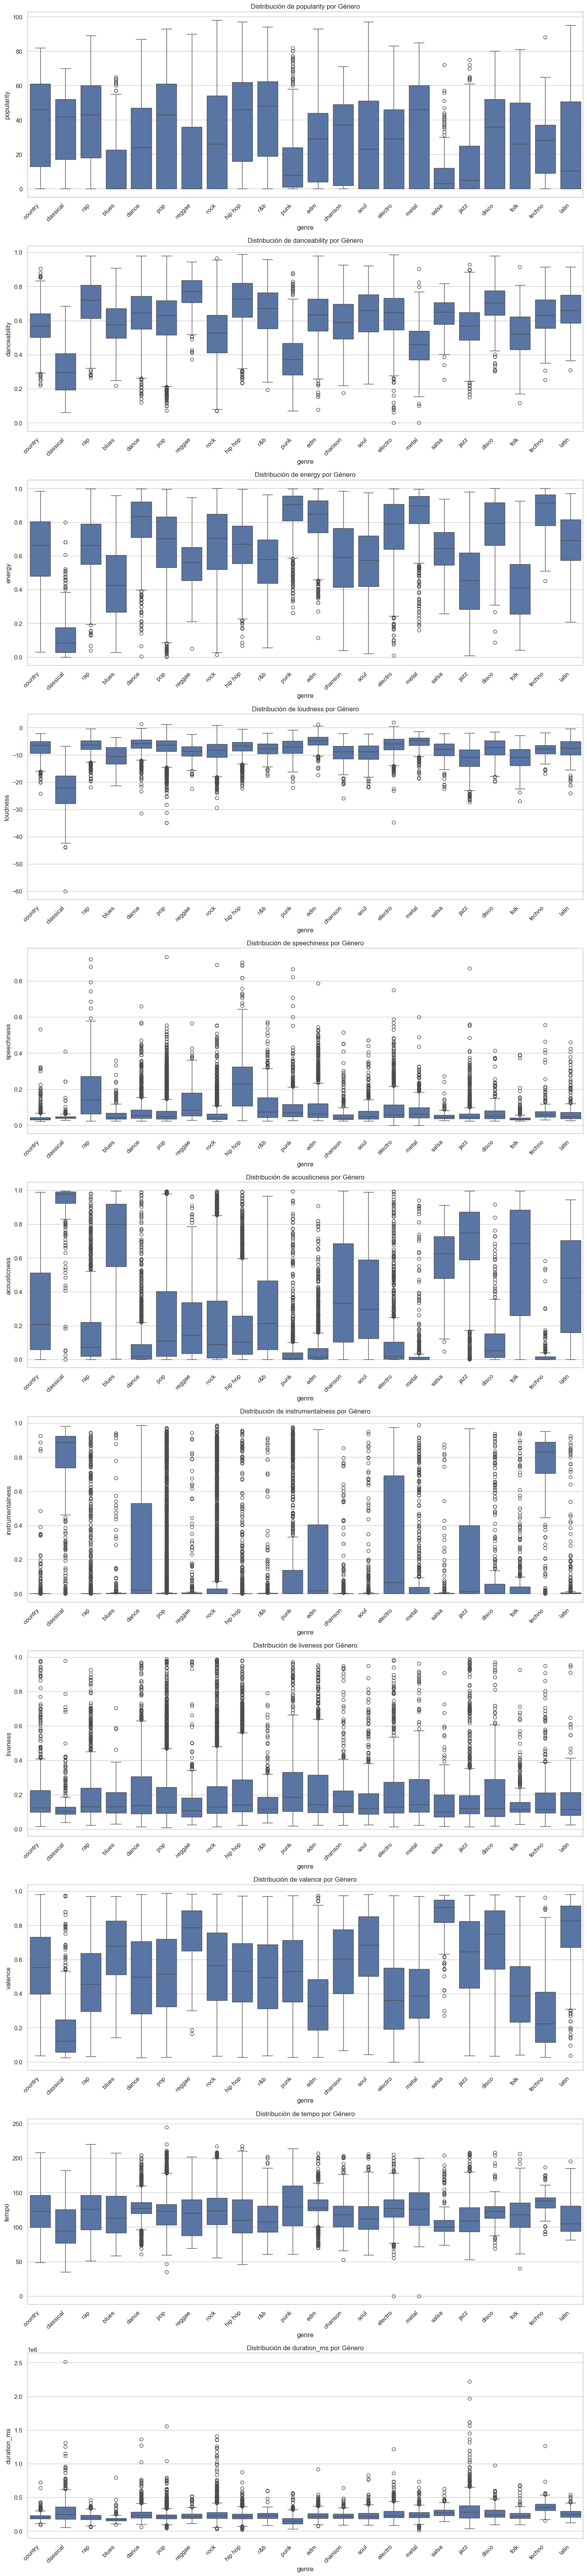

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


# Excluye manualmente las columnas booleanas si las conoces
discrete_columns = ['explicit', 'mode', 'time_signature','key']  # Reemplaza con tus columnas booleanas
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col not in discrete_columns]


plt.figure(figsize=(15, 100))

for i, col in enumerate(numeric_columns):
    plt.subplot(17, 1, i + 1) # Ajusta la grilla según la cantidad de features
    sns.boxplot(x='genre', y=col, data=df_train) # 'df' es tu dataframe
    plt.xticks(rotation=45, ha='right')  # Rota las etiquetas y alinea a la derecha
    plt.title(f'Distribución de {col} por Género')

plt.tight_layout()
plt.show()




## Interprétation des boxes :
- Popularity : dans l'ensemble, les données sont bien réparties, beaucoup d'entre elles ont de nombreuses valeurs nulles. La salsa et le punk ont des valeurs bien centrées sur le fait qu'ils ne sont pas très populaires.
- Danceability : cela semble être une bonne caractéristique, car les boîtes sont petites et plusieurs d'entre elles sont situées de différentes manières, comme le classique, la country, la salsa, la techno, la musique latine. La pop, la dance et l'électro ont beaucoup de valeurs aberrantes.
- Energy : certains genres ont une tendance très spécifique, mais avec de nombreuses valeurs aberrantes, comme le punk, l'EDM, le métal, le classique, la techno et la salsa.
- Loudness : on peut trouver des caractéristiques notables, car la plupart des données se situent dans de petites fourchettes, entre -5 et -10, et peuvent varier quelque peu par rapport aux autres genres. Certaines valeurs aberrantes nuisent à l'efficacité de cette caractéristique.
- Speechiness : bien qu'il s'agisse d'une caractéristique présentant de nombreuses valeurs aberrantes, elle est excellente pour identifier des genres tels que le rap ou le hip-hop, qui ont un comportement très différent.
- Acousticness : les genres tels que la country, la pop, le reggae, le rock, le hip-hop, le r&b, la chanson, la soul, le folk et la musique latine ont des comportements similaires. Tous les autres ont des caractéristiques fortes et bien concentrées sur une valeur.
- Instrumentalness : elle comporte trop de valeurs aberrantes dans tous les genres, mais dénote un comportement différentiel pour la techno et la musique classique, car elle ne se concentre pas sur 0 comme la plupart des genres.
- Liveness : elle ne semble pas présenter de comportements très variés entre les genres en général, la seule chose à souligner étant des données plus concentrées sur la musique classique et le folk.
- Valence : plusieurs genres présentent des tendances similaires, à l'exception de la salsa, de la musique classique, de la techno et de la musique latine qui se distinguent fortement.
- Tempo : je dirais que cela n'aide pas beaucoup à la tâche de classification, car la plupart des données de tous les genres se situent entre 100 et 150. 
- Duration_ms : la plupart des valeurs se situent entre 0 et 0,51e6, il y a trop de valeurs aberrantes, on pourrait dire que la musique classique et le jazz ont une durée de morceau plus variée, tandis que d'autres genres se concentrent beaucoup sur une gamme spécifique de durées.

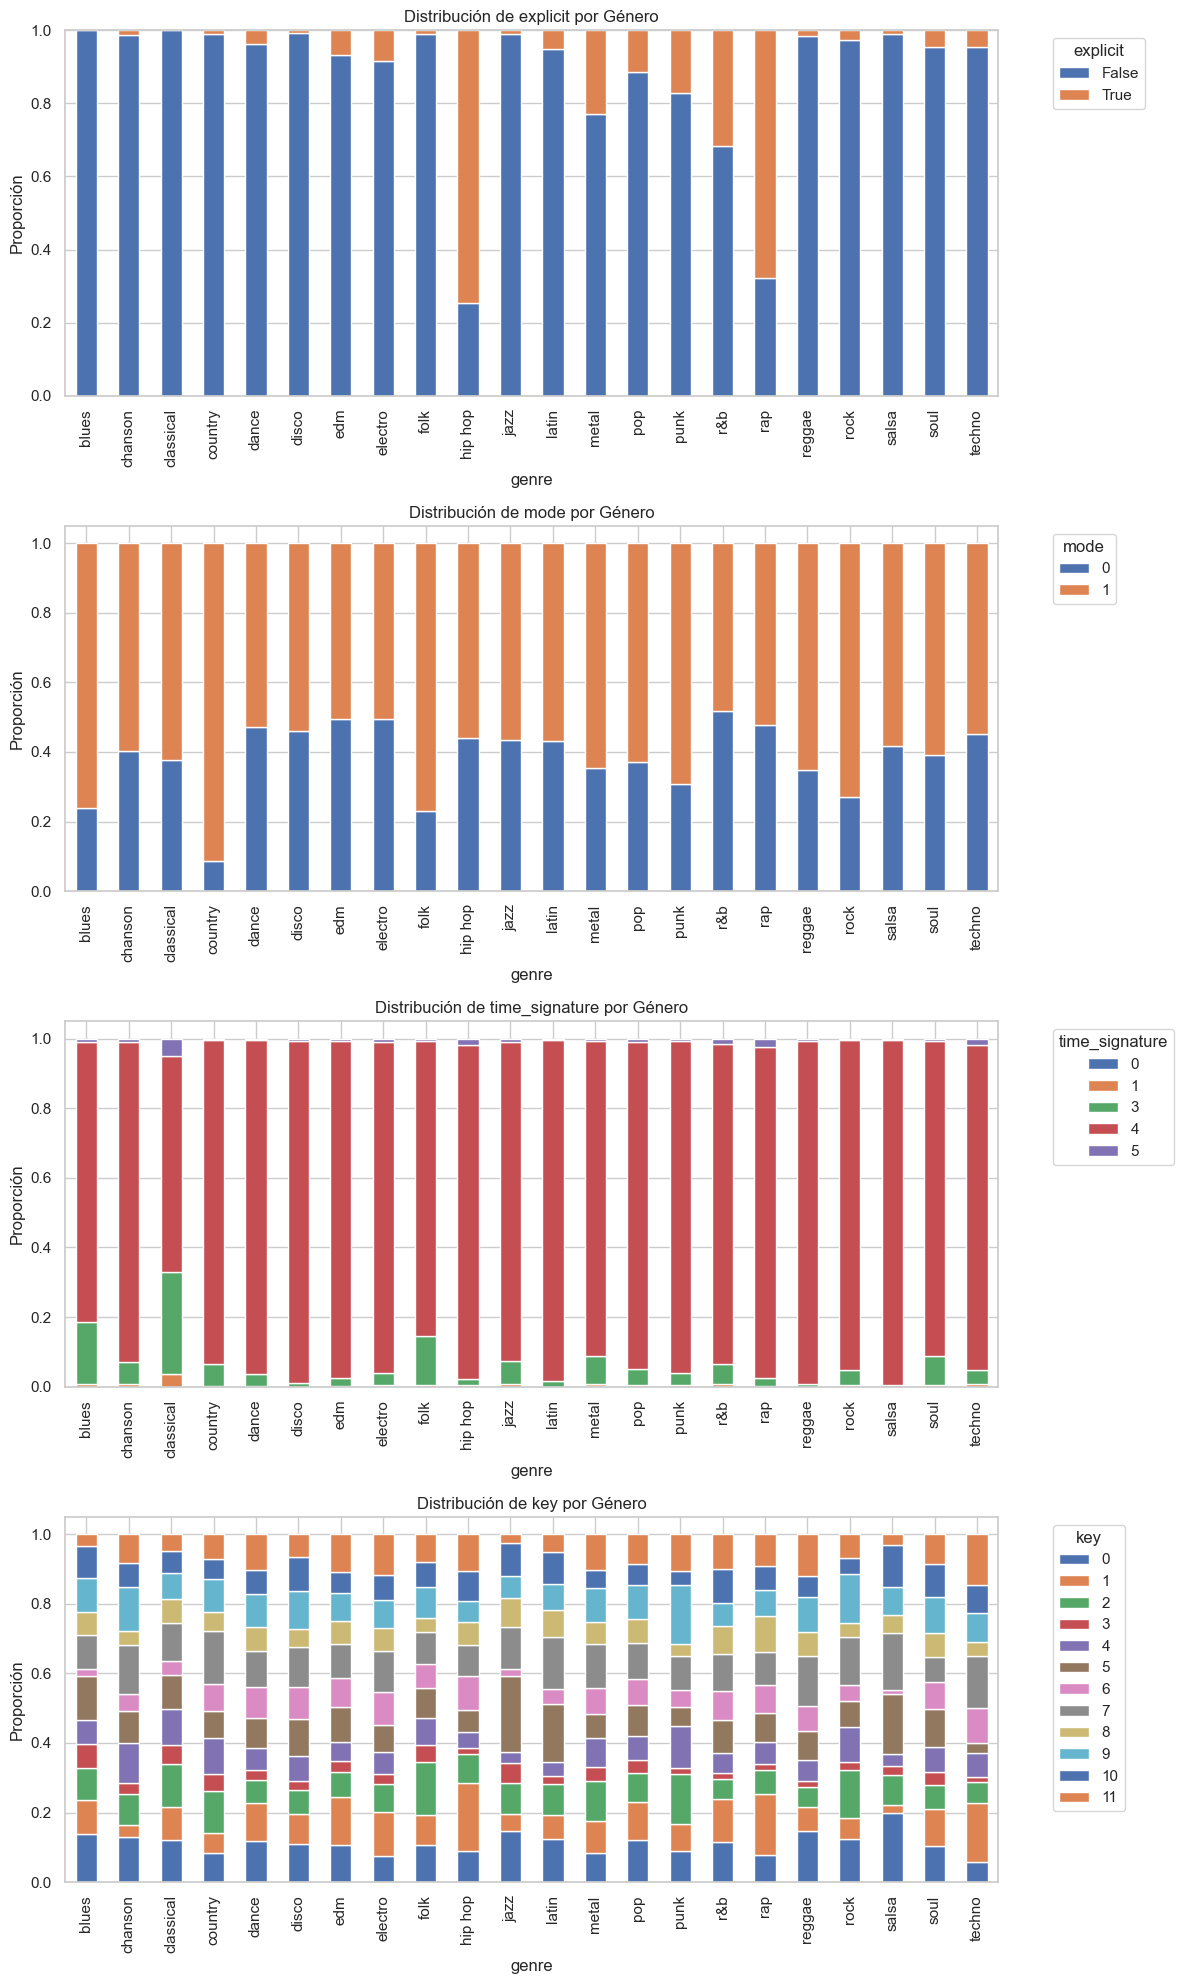

In [44]:


fig, axes = plt.subplots(len(discrete_columns), 1, figsize=(12, 20))
for i, feature in enumerate(discrete_columns):
    ct = pd.crosstab(df_train['genre'], df_train[feature], normalize='index')
    
    # 3. Graficar
    ct.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_ylabel('Proporción')
    axes[i].set_title(f'Distribución de {feature} por Género')
    axes[i].legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Caractéristiques discrètes
- Explicit : c'est une caractéristique très utile pour identifier à la fois le hip-hop et le rap.

- Mode : il n'y a pas beaucoup de différences, seul le country affiche un comportement marqué vers un mode = 1.

- Time_signature : la plupart des genres ont uniquement cette valeur = 4, mais le classique est le seul à avoir un pourcentage élevé en 3, ce qui pourrait être un bon identifiant de la musique classique.

- Key : elle comporte 12 valeurs où insérer les données et ne présente pas de comportement vraiment marqué vers un genre particulier. Je considère qu'il s'agit d'une caractéristique qu'il vaudrait mieux laisser hors du modèle, car elle apporte trop de complexité.

Analisis tiempo de publicación.

C:\Users\alfar\AppData\Local\Temp\ipykernel_12188\2527789609.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='days_since_release', data=df_train, palette="viridis")


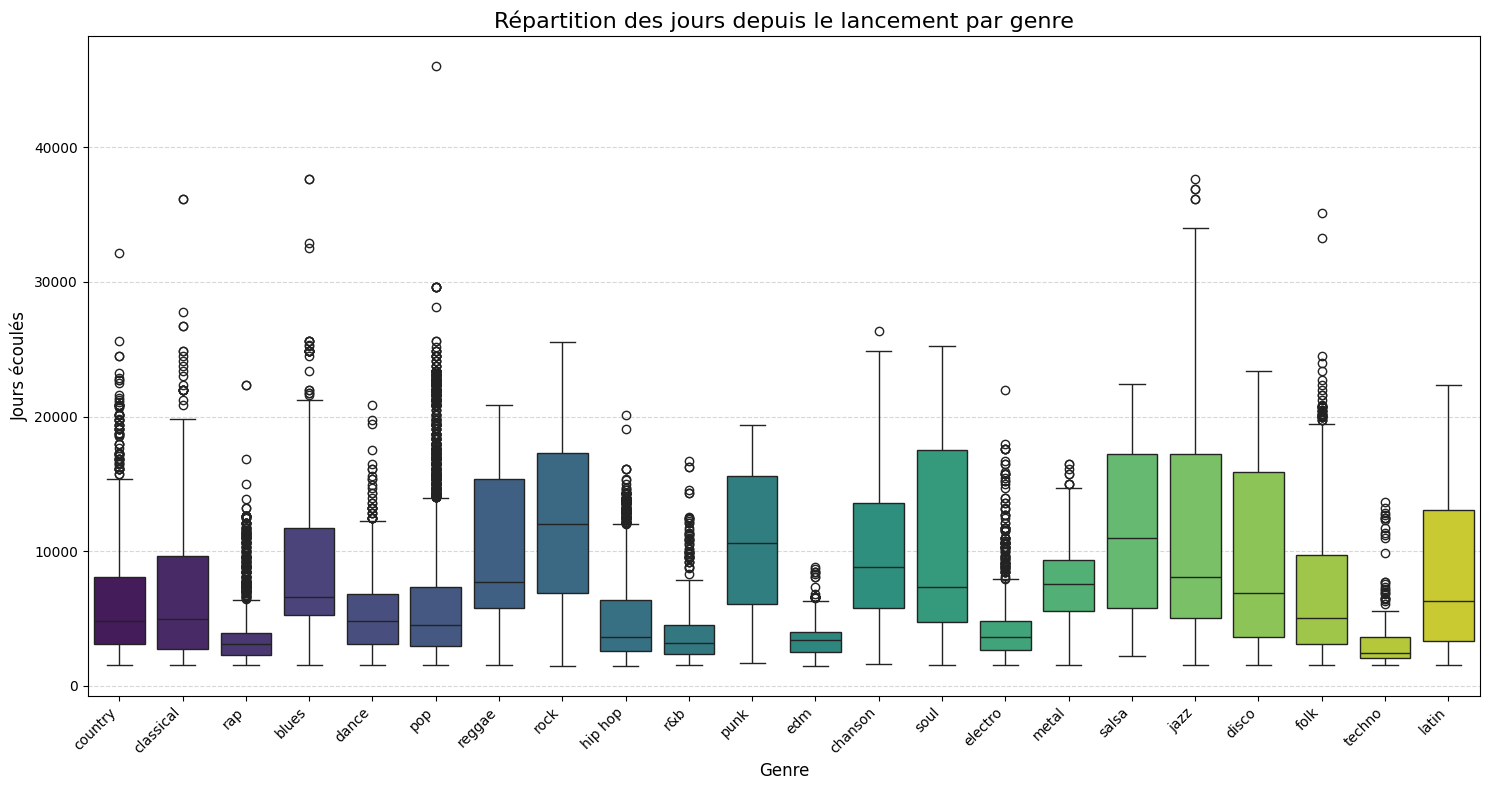

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar datos
df_train = pd.read_csv("../data/raw/spotify_dataset_train.csv")

# 2. Crear la variable 'days_since_release'
# Convertimos a datetime
df_train['release_date'] = pd.to_datetime(df_train['release_date'], format='mixed', errors='coerce')

# Calculamos los días transcurridos hasta hoy
# (Usamos pd.Timestamp.now() para obtener la fecha actual)
df_train['days_since_release'] = (pd.Timestamp.now() - df_train['release_date']).dt.days

# 3. Generar el Boxplot único
plt.figure(figsize=(15, 8))

sns.boxplot(x='genre', y='days_since_release', data=df_train, palette="viridis")

plt.title('Répartition des jours depuis le lancement par genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Jours écoulés', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotamos etiquetas para que se lean bien
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()